In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/710 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.83k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/818 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

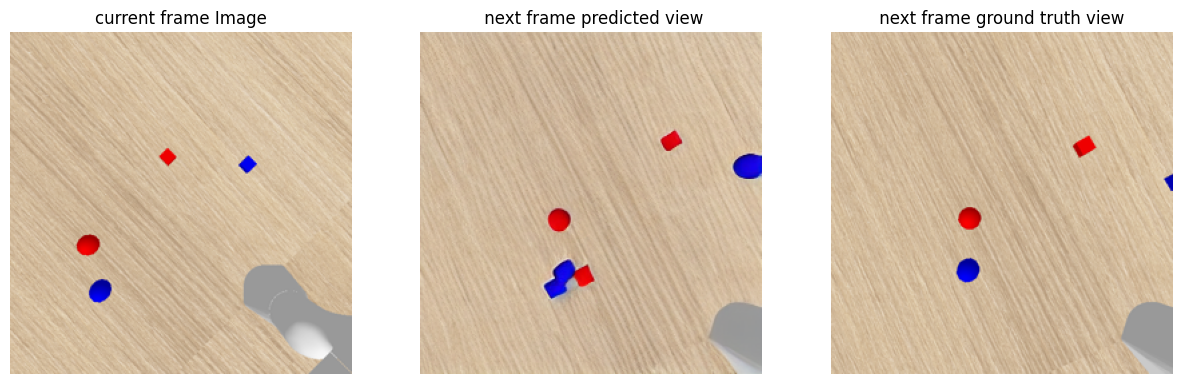

In [ ]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline
import matplotlib.pyplot as plt
#model_id = "shahidhasib586/instruct-pix2pix-model" # <- the fine-tuned model in cluster https://huggingface.co/shahidhasib586/instruct-pix2pix-model -> old : 1 object to detect
model_id = "Shahidhasib1014/instruct-pix2pix-custom" #https://huggingface.co/Shahidhasib1014/instruct-pix2pix-custom -> new : 4 object to detect
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
generator = torch.Generator("cuda").manual_seed(0)

#image= PIL.Image.open("/content/drive/MyDrive/tiny_reach_dataset/small/reach_target/demo_3/frame_03.png").convert("RGB")
#image_ground_truth= PIL.Image.open("/content/drive/MyDrive/tiny_reach_dataset/small/reach_target/demo_3/frame_04.png").convert("RGB")

image= PIL.Image.open("/content/drive/MyDrive/tiny_reach_dataset/reach_target_4_objects-evaluation/demo_4/frame_00.png").convert("RGB")
image_ground_truth= PIL.Image.open("/content/drive/MyDrive/tiny_reach_dataset/reach_target_4_objects-evaluation/demo_4/frame_01.png").convert("RGB")

prompt = "reach the red ball"
num_inference_steps = 100
image_guidance_scale = 1.5
guidance_scale = 7.5

edited_image = pipe(prompt,
   image=image,
   num_inference_steps=num_inference_steps,
   image_guidance_scale=image_guidance_scale,
   guidance_scale=guidance_scale,
   generator=generator,
).images[0]

edited_image.save("edited_image.png")


# Display the before and after images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the original image
axes[0].imshow(image)
axes[0].set_title("current frame Image")
axes[0].axis("off")

# Display the edited image
axes[1].imshow(edited_image)
axes[1].set_title(" next frame predicted view")
axes[1].axis("off")

# Display the ground truth next frame image
axes[2].imshow(image_ground_truth)
axes[2].set_title(" next frame ground truth view ")
axes[2].axis("off")

plt.show()

In [ ]:
'''
paper inference parameters:

    parser.add_argument("--num_inference_steps", type=int, default=100)
    parser.add_argument("--image_guidance_scale", type=float, default=1.5)
    parser.add_argument("--guidance_scale", type=float, default=7.5)

    model_id = opt.load_weights_folder
    pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    model_id, torch_dtype=torch.float16, use_safetensors=True, safety_checker = None,
    ).to("cuda")
    generator = torch.Generator("cuda").manual_seed(0)
    err = 1e5
    if err < 200:
        print("Minimum error reached!")